In [1]:
# 텐서플로는 자동 미분(주어진 입력 변수에 대한 연산의 gradient를 게산하는 것)을 위한 tf.Gradient
import tensorflow as tf
import numpy as np
from keras import optimizers

In [ ]:
x = tf.Variable(5.0)
w = tf.Variable(0.0)

@tf.function
def train_step():
    # GradientTape : 연산과정을 기억해 뒀다가 나중에 자동으로 gradient 편미분을 계산하는 클래스
    with tf.GradientTape() as tape:
        y = tf.multiply(w, x)
        loss = tf.square(tf.subtract(y, 50))
    grad = tape.gradient(loss, w) # 자동 미분 계산
    mu = 0.01 # 학습률
    w.assign_sub(mu * grad) # type: ignore
    return loss

for i in range(10):
    loss = train_step()
    print(f'{i:1}, w: {w.numpy():.5f}, loss: {loss.numpy():.5f}') # type: ignore

In [3]:
# keras.optimizers 패키지의 있는 Adam, SGD, RMSprop ... 사용
opti = optimizers.SGD(learning_rate=0.01)
x = tf.Variable(5.0)
w = tf.Variable(0.0)

@tf.function
def train_step():
    # GradientTape : 연산과정을 기억해 뒀다가 나중에 자동으로 gradient 편미분을 계산하는 클래스
    with tf.GradientTape() as tape:
        y = tf.multiply(w, x)
        loss = tf.square(tf.subtract(y, 50))
    grad = tape.gradient(loss, w) # 자동 미분 계산
    
    opti.apply_gradients([(grad, w)])
    
    return loss

for i in range(10):
    loss = train_step()
    print(f'{i:1}, w: {w.numpy():.5f}, loss: {loss.numpy():.5f}') # type: ignore

2025-09-11 09:46:13.928466: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-11 09:46:13.928696: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-11 09:46:13.928713: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-11 09:46:13.929135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-11 09:46:13.929336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-09-11 09:46:14.149432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


0, w: 5.00000, loss: 2500.00000
1, w: 7.50000, loss: 625.00000
2, w: 8.75000, loss: 156.25000
3, w: 9.37500, loss: 39.06250
4, w: 9.68750, loss: 9.76562
5, w: 9.84375, loss: 2.44141
6, w: 9.92188, loss: 0.61035
7, w: 9.96094, loss: 0.15259
8, w: 9.98047, loss: 0.03815
9, w: 9.99023, loss: 0.00954


tf.Tensor(0.13738558, shape=(), dtype=float32)
tf.Tensor(0.1080863, shape=(), dtype=float32)
tf.Tensor(0.10783967, shape=(), dtype=float32)
tf.Tensor(0.107731745, shape=(), dtype=float32)
tf.Tensor(0.10763147, shape=(), dtype=float32)
tf.Tensor(0.1075377, shape=(), dtype=float32)
tf.Tensor(0.10745009, shape=(), dtype=float32)
tf.Tensor(0.107368216, shape=(), dtype=float32)
tf.Tensor(0.107291736, shape=(), dtype=float32)
[3.8895829, 2.311787, 1.3923204, 0.8564954, 0.54423726, 0.36226356, 0.2562129, 0.19440636, 0.15838332, 0.13738558, 0.12514387, 0.118004754, 0.11383939, 0.11140679, 0.10998416, 0.109149955, 0.10865887, 0.108367704, 0.10819302, 0.1080863, 0.10801928, 0.10797527, 0.107944846, 0.10792235, 0.10790446, 0.10788932, 0.10787573, 0.10786319, 0.10785129, 0.10783967, 0.10782839, 0.10781722, 0.107806206, 0.107795335, 0.107784525, 0.10777386, 0.107763186, 0.10775264, 0.10774213, 0.107731745, 0.1077214, 0.10771118, 0.10770096, 0.10769077, 0.10768072, 0.10767074, 0.10766079, 0.10765095

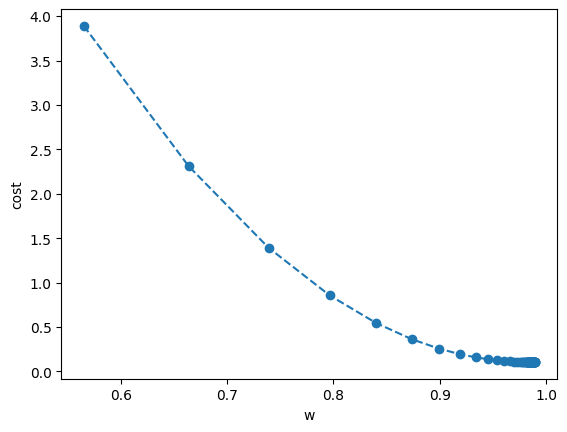

cost가 최소일 때 w : 0.9893
cost가 최소일 때 b : 0.0849
y_pred : [1.0741296 2.0633926 3.052656  4.0419188 5.0311823]


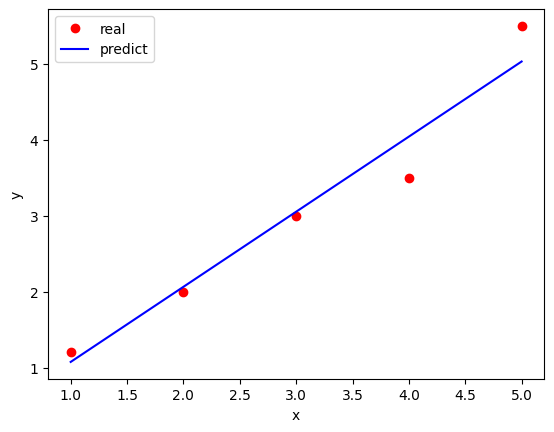

실제값 : [3.5, 9.0]
예측결과 : [3.5472875 8.9882345]


In [33]:
# 선형회귀 모델 작성
# keras.optimizers 패키지의 있는 Adam, SGD, RMSprop ... 사용
opti = keras.optimizers.SGD(learning_rate=0.01, )

tf.random.set_seed(2)
w = tf.Variable(tf.random.normal((1,)))
b = tf.Variable(tf.random.normal((1,)))

@tf.function
def train_step3(x,y):
    # GradientTape : 연산과정을 기억해 뒀다가 나중에 자동으로 gradient 편미분을 계산하는 클래스
    with tf.GradientTape() as tape:
        hypo = tf.add(tf.multiply(w,x), b)
        loss = tf.reduce_mean(tf.square(tf.subtract(hypo, y)))
    
    grad = tape.gradient(loss, [w,b]) # 자동 미분 계산
    
    opti.apply_gradients(zip(grad, [w,b])) # type: ignore
    return loss

x = [1.,2.,3.,4.,5.]
y = [1.2, 2.0, 3.0, 3.5, 5.5]

w_vals = []
cost_vals = []

for i in range(1,100):
    cost_val = train_step3(x, y)
    cost_vals.append(cost_val.numpy()) # type: ignore
    w_vals.append(w.numpy()) # type: ignore
    if i % 10 == 0:
        print(cost_val)
    
print(cost_vals)
print(w_vals)

# 시각화
import matplotlib.pyplot as plt
plt.plot(w_vals, cost_vals, 'o--')
plt.xlabel('w')
plt.ylabel('cost')
plt.show()
plt.close()

print(f'cost가 최소일 때 w : {w.numpy()[0]:.4f}') # type: ignore
print(f'cost가 최소일 때 b : {b.numpy()[0]:.4f}') # type: ignore

y_pred = tf.add(tf.multiply(x, w), b)
print(f'y_pred : {y_pred}')

# 회귀선 시각화
plt.plot(x, y, 'ro', label='real')
plt.plot(x, y_pred, 'b-', label='predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
plt.close()

# 새 값으로 예측하기
new_x = [3.5, 9.0]
new_pred = tf.add(tf.multiply(new_x, w), b)
print(f'실제값 : {new_x}')
print(f'예측결과 : {new_pred.numpy()}')